So I was given a task to experimenting on how 2D and 3D transformation can be executed. Because it's my first time to do this, I start with a simple square that drawn on cartesian diagram.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import string
import math 
from pylab import *
import numpy
import scipy.ndimage
import scipy.interpolate
import pdb

I searched how to make the square on google, so it would be the same in case I copy all the codes to make the square, but I will learn how the square is made.

In [4]:
# mendeklarasi poin a - d
a, b, c, d = (-1, 1, 0), (-1, -1, 1), (1, -1, 2), (1, 1, 3)

# bikin matriks yang isinya 
# A = (-1,1,0),
#     (-1,-1,1),
#     (1,-1,2),
#     (1,1,3)
# ANGKA TERAKHIT ITU INDEKS, dua angka pertama itu x dan y secara 
# berurutan
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

# np.eye itu Return a 2-D array with ones on the diagonal and zeros elsewhere.
# jadi di atas dia membentuk matriks identitas
# [[ 1.,  0.,  0.],
#   [ 0.,  1.,  0.],
#   [ 0.,  0.,  1.]]

At this point, I don't really understand why an identity matrix is needed. 

[-1.  1.  0.]
[-1. -1.  1.]
[ 1. -1.  2.]
[1. 1. 3.]


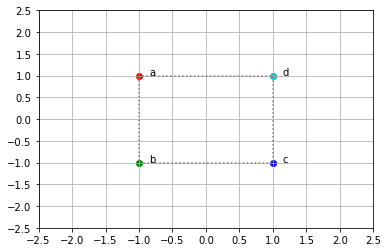

In [5]:
color_lut = 'rgbc' #menentukan warna tiap titiknya

fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = I @ row #matrix multiplication.
    print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
ax.set_xticks(np.arange(-2.5, 3, 0.5)) #x keatas dari -2.5 sampai 3, dengan jarak interval 0.5
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

the identity matrix is helping us to map the x and y point, because the result of identity matrix multiplied by any matrix is that any matrix itself.

In [6]:
affine = np.array([[2,0,0],[0,1,0],[0,0,1]])

affine transformation matrix consist of 6 degree of freedom:

[[a1,a2,t1]
 [a3,a4,t2]
 [0 , 0, 1]]

[-2  1  0]
[-2 -1  1]
[ 2 -1  2]
[2 1 3]


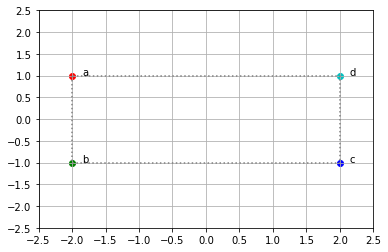

In [7]:
fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = affine @ row #matrix multiplication.
    print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
ax.set_xticks(np.arange(-2.5, 3, 0.5)) #x keatas dari -2.5 sampai 3, dengan jarak interval 0.5
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

as we can see, by changing a1 and a4, our square is scaled up. I only change the value of a1 to 2, and the x value is multiplied by 2. 

In [8]:
affine = np.array([[1,0,0],[0,2,0],[0,0,1]])

[-1  2  0]
[-1 -2  1]
[ 1 -2  2]
[1 2 3]


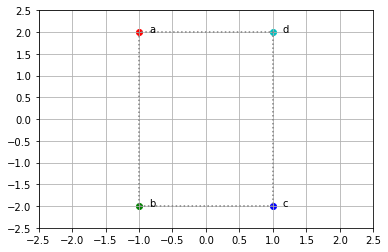

In [9]:
fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = affine @ row #matrix multiplication.
    print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
ax.set_xticks(np.arange(-2.5, 3, 0.5)) #x keatas dari -2.5 sampai 3, dengan jarak interval 0.5
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

Then I try to change only the a4, and the y value of every point got multiplied by 2. 

In [10]:
affine = np.array([[2,0,0],[0,2,0],[0,0,1]])

[-2  2  0]
[-2 -2  1]
[ 2 -2  2]
[2 2 3]


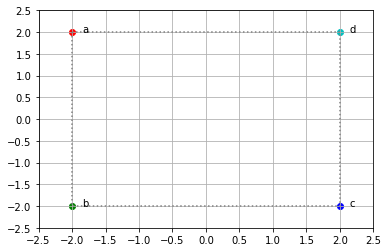

In [11]:
fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = affine @ row #matrix multiplication.
    print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
ax.set_xticks(np.arange(-2.5, 3, 0.5)) #x keatas dari -2.5 sampai 3, dengan jarak interval 0.5
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

Here we got our square scaled up by 2 because all of the points x and y get multiplied by 2. 

In [12]:
affine = np.array([[0,1.5,0],[-2,0,0],[0,0,1]])

[1.5 2.  0. ]
[-1.5  2.   1. ]
[-1.5 -2.   2. ]
[ 1.5 -2.   3. ]


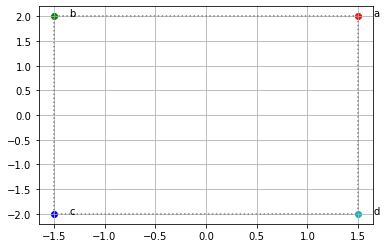

In [13]:
fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = affine @ row #matrix multiplication.
    print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

This time it got scaled by 1.5 for x, 2 for y and it got rotated too because i was changing the a3 to -2.

In [14]:
affine = np.array([[1,0,1],
                   [0,1,0],
                   [0,0,1]])

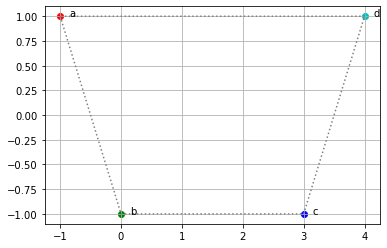

In [15]:
fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = affine @ row #matrix multiplication.
    #print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

Based on what I read, It should be translate the poin +1 to the right. But with my code, the point that moved only the b point

In [16]:
affine = np.array([[1,0,1],
                   [0,1,0],
                   [0,0,1]])

In [17]:
print("A=",A)
print("affine=",affine)
print("result=")
for row in A:
    output_row = affine @ row #matrix multiplication.
    print(output_row)
    x, y, i = output_row
    

A= [[-1  1  0]
 [-1 -1  1]
 [ 1 -1  2]
 [ 1  1  3]]
affine= [[1 0 1]
 [0 1 0]
 [0 0 1]]
result=
[-1  1  0]
[ 0 -1  1]
[ 3 -1  2]
[4 1 3]


Well, I consider to go on..I'll start the rotation instead..

In [18]:
a = math.pi/6
affine = np.array([[math.cos(a),math.sin(a),0],
                   [-math.sin(a),math.cos(a),0],
                   [0,0,1]])

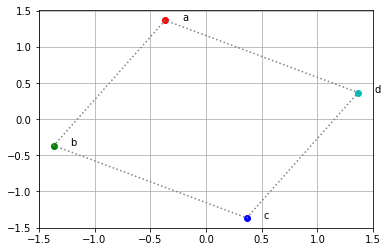

In [19]:
fig = plt.figure() ## create a figure object
ax = plt.gca() # to get a reference to the current axes, if you need to change the limits on the y-axis
xs = []
ys = []
for row in A:
    output_row = affine @ row #matrix multiplication.
    #print(output_row)
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c) #nempatin x sama y ke koordinat, ngasih warna juga ke titiknya
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}") #nambahin huruf a,b,c,d 
xs.append(xs[0]) 
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted') #ngasih garis warna abu2 dengan style 'dotted'
plt.grid() # make ini biar ada kotak-kotaknya
plt.show()

## Experimenting on picture
Because I think I already understand the concept of affine matrix transformation, I want to apply it on a picture


(256, 256, 3)
uint8


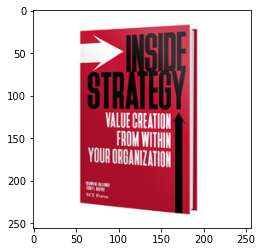

In [20]:
img = plt.imread('exp.jpg')
print(img.shape)
print(img.dtype)
plt.imshow(img)

From what I learned before, I think I can multiply the pixel with affine matrix. however my goal is to stretch the picture so i can see the 3d perspective picture like a 2D picture

In [33]:
#i declared an empty matrix with shape and type that are the same with 
#the picture
affine = np.array([[5,0,1],[0,7,1],[0,0,1]])

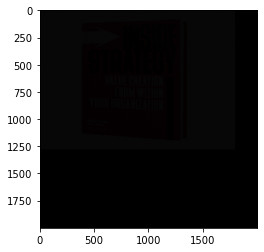

In [34]:
result = np.empty((2000, 2000, 3), dtype=np.uint8) #make an empty matrix for the transformed picture
for i, row in enumerate(img):
    for j, col in enumerate(row): #by this we can get the row data
        pixel_data = img[i, j, :] #ini untuk ngambil data2 di pixelnya
        input_coords = np.array([i, j, 1]) #habis itu ini untuk indexing
        i_out, j_out, _ = affine @ input_coords #terus indexnya dikali ke matriks tadi
        result[i_out, j_out, :] = pixel_data #lalu index dari result itu, diisi make pixel data yang udah diambil sebelumnya

#plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

The image is not too sharp... because the pixel has been scaled and there's a gap between the pixel. 